## Including Libraries

In [60]:
import pandas as pd
import numpy as np
import nltk
import re
import string
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)

## Import dataset

In [61]:
import pandas
df_sms=pd.read_csv('spam.csv',encoding='latin-1')
df_sms.head(10) 
df_sms.label.value_counts()
stopwords = nltk.corpus.stopwords.words('english')

#      Data Preprossing :
## Checking length of SMS

In [62]:
print(len(df_sms))
df_sms.label.value_counts()
df_sms['length']=df_sms['sms'].apply(len)
df_sms.head(10)

11131


,label,sms,Unnamed: 2,Unnamed: 3,Unnamed: 4,length
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,111
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,155
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,61
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN,148
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN,77
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN,160
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN,158
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN,154


In [63]:
df_sms.describe()
df_sms.tail()
df_sms.shape # how many values are in there
df_sms.size  # size in byte
df_sms.count() # columnwise availabe values

label         11131
sms           11131
Unnamed: 2       50
Unnamed: 3       12
Unnamed: 4        6
length        11131
dtype: int64

## Dropping unwanted column

In [64]:
df_sms = df_sms.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
df_sms.head(10)

,label,sms,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
5,spam,FreeMsg Hey there darling it's been 3 week's n...,148
6,ham,Even my brother is not like to speak with me. ...,77
7,ham,As per your request 'Melle Melle (Oru Minnamin...,160
8,spam,WINNER!! As a valued network customer you have...,158
9,spam,Had your mobile 11 months or more? U R entitle...,154


#  Feature Extraction:

## Analyzing data

<AxesSubplot:ylabel='Frequency'>

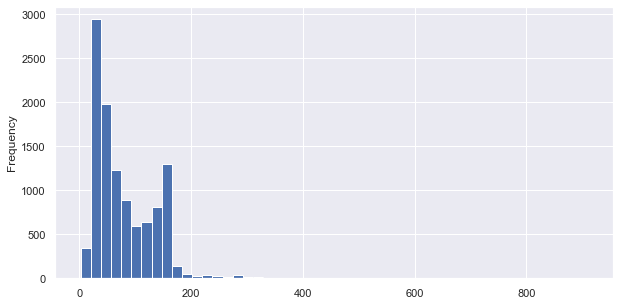

In [65]:
df_sms['length'].plot(bins=50, kind='hist',figsize=(10,5))

array([<AxesSubplot:title={'center':'ham'}>,
       <AxesSubplot:title={'center':'spam'}>], dtype=object)

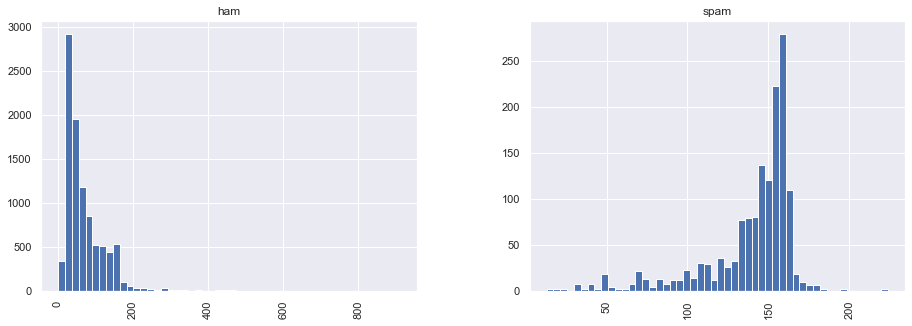

In [66]:
df_sms.hist(column='length', by='label', bins=50,figsize=(15,5)) 

In [67]:
df_sms.loc[:,'label'] = df_sms.label.map({'ham':0, 'spam':1}) #labeling
print(df_sms.shape)
df_sms.head()

(11131, 3)


,label,sms,length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


## spam vs ham words per text

<AxesSubplot:xlabel='label', ylabel='count'>

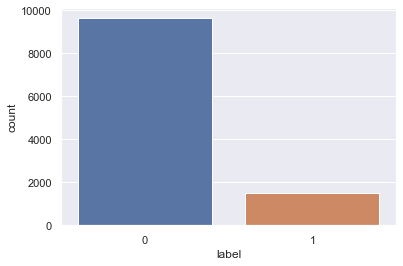

In [68]:
sns.countplot(x="label", data=df_sms) #computing spam in plot

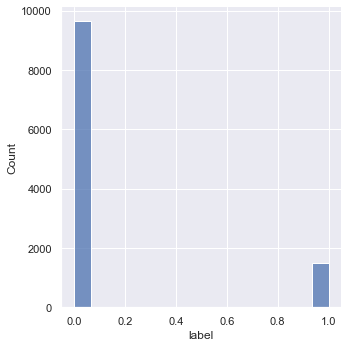

In [69]:
sns.displot(df_sms['label'])

## Clean Text

In [70]:
def clean_text(text):
    text = "".join([c for c in text if c not in string.punctuation])
    tokens= re.split('\W+', text)
    text = [word for word in tokens if word not in stopwords]
    return text

df_sms['sms_nostop'] = df_sms['sms'].apply(lambda x: clean_text(x.lower()))
df_sms.head()

,label,sms,length,sms_nostop
0,0,"Go until jurong point, crazy.. Available only ...",111,"[go, jurong, point, crazy, available, bugis, n..."
1,0,Ok lar... Joking wif u oni...,29,"[ok, lar, joking, wif, u, oni]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,"[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,0,U dun say so early hor... U c already then say...,49,"[u, dun, say, early, hor, u, c, already, say]"
4,0,"Nah I don't think he goes to usf, he lives aro...",61,"[nah, dont, think, goes, usf, lives, around, t..."


## Stemming

In [71]:
from nltk.stem import PorterStemmer , LancasterStemmer
ps=  PorterStemmer()

def stemming(tokenized_text):
    text = [ps.stem(word) for word in tokenized_text]
    return text

df_sms['sms_stemmed'] = df_sms['sms_nostop'].apply(lambda x: stemming(x))

## Lemmatization

In [72]:
import nltk
from nltk.stem import WordNetLemmatizer 
lemma=  WordNetLemmatizer ()

def lemmatization(tokenized_text):
    text = [lemma.lemmatize(word) for word in tokenized_text]
    return text

df_sms['sms_lemmatized'] = df_sms['sms_stemmed'].apply(lambda x: lemmatization(x))


# Bag of Words Approach

## 1. Convert  strings to their lower case form:

In [73]:
documents = ["Hello, how are you!",
             "Sorry, i'll call later in meeting.",
             "Call me now.",
             "Hello, Call hello you tomorrow?"]

lower_case_documents=[]
lower_case_documents=[d.lower() for d in documents]
print(lower_case_documents)

['hello, how are you!', "sorry, i'll call later in meeting.", 'call me now.', 'hello, call hello you tomorrow?']


##  2.Removing all punctuations:

In [74]:
sans_punctuation_documents = []


for i in lower_case_documents:
    sans_punctuation_documents.append(i.translate(str.maketrans("","", string.punctuation)))
    
sans_punctuation_documents

['hello how are you',
 'sorry ill call later in meeting',
 'call me now',
 'hello call hello you tomorrow']

## 3. Tokenization:

In [75]:
preprocessed_documents=[[w for w in d.split()] for d in sans_punctuation_documents]
preprocessed_documents

[['hello', 'how', 'are', 'you'],
 ['sorry', 'ill', 'call', 'later', 'in', 'meeting'],
 ['call', 'me', 'now'],
 ['hello', 'call', 'hello', 'you', 'tomorrow']]

## 4.Count frequencies

In [76]:
frequency_list = []
import pprint
from collections import Counter

frequency_list = [Counter (d) for d in preprocessed_documents]
pprint.pprint(frequency_list)

[Counter({'hello': 1, 'how': 1, 'are': 1, 'you': 1}),
 Counter({'sorry': 1, 'ill': 1, 'call': 1, 'later': 1, 'in': 1, 'meeting': 1}),
 Counter({'call': 1, 'me': 1, 'now': 1}),
 Counter({'hello': 2, 'call': 1, 'you': 1, 'tomorrow': 1})]


# CountVectorizer

In [77]:
from sklearn.feature_extraction.text import CountVectorizer
count_vector = CountVectorizer()
count_vector.fit(documents)
count_vector.get_feature_names()

['are',
 'call',
 'hello',
 'how',
 'in',
 'later',
 'll',
 'me',
 'meeting',
 'now',
 'sorry',
 'tomorrow',
 'you']

In [78]:
print(count_vector.vocabulary_)

{'hello': 2, 'how': 3, 'are': 0, 'you': 12, 'sorry': 10, 'll': 6, 'call': 1, 'later': 5, 'in': 4, 'meeting': 8, 'me': 7, 'now': 9, 'tomorrow': 11}


In [79]:
doc_array = count_vector.transform(documents).toarray()
doc_array

array([[1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0],
       [0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]], dtype=int64)

In [80]:
frequency_matrix = pd.DataFrame(doc_array, columns = count_vector.get_feature_names())
frequency_matrix

,are,call,hello,how,in,later,ll,me,meeting,now,sorry,tomorrow,you
0,1,0,1,1,0,0,0,0,0,0,0,0,1
1,0,1,0,0,1,1,1,0,1,0,1,0,0
2,0,1,0,0,0,0,0,1,0,1,0,0,0
3,0,1,2,0,0,0,0,0,0,0,0,1,1


## Visualizing data

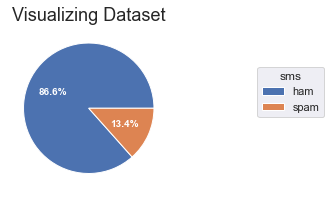

In [81]:
fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))

dataset = ["9637 ham",
          "1494 spam"]
data = [float(x.split()[0]) for x in dataset]
sms = [x.split()[-1] for x in dataset]

wedges, texts, autotexts ,  = ax.pie(data, autopct = '%2.1f%%',
                                  textprops=dict(color="w"))

ax.legend(wedges, sms,
          title="sms",
          loc="center left",
          bbox_to_anchor=(1.5, 0,0,1.2))

plt.setp(autotexts, size=10, weight="bold")

ax.set_title("Visualizing Dataset", size=18)

plt.show()

## Splitting dataset into train & test

In [82]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_sms['sms'], 
                                                    df_sms['label'],test_size=0.20, 
                                                    random_state=1)

In [83]:
count_vector = CountVectorizer()
X_train = count_vector.fit_transform(X_train)
X_test = count_vector.transform(X_test)

   # Implementation of Classifiers


## Implementing Multinomial Naive Bayes (MNB) 

In [84]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train,y_train)
nb.score(X_test,y_test)
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
predictions = nb.predict(X_test)


## Evaluating Model with MNB

In [85]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy score: {}'.format(accuracy_score(y_test, predictions)))
print('Precision score: {}'.format(precision_score(y_test, predictions)))
print('Recall score: {}'.format(recall_score(y_test, predictions)))
print('F1 score: {}'.format(f1_score(y_test, predictions)))

Accuracy score: 0.9941625505163898
Precision score: 0.9893617021276596
Recall score: 0.9653979238754326
F1 score: 0.9772329246935202


## Implementing Logistic Regression

In [86]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)
lr.score(X_test,y_test)
LogisticRegression(solver='liblinear', penalty='l1')
predictions = lr.predict(X_test)

## Evaluating Model with LR

In [87]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy score: {}'.format(accuracy_score(y_test, predictions)))
print('Precision score: {}'.format(precision_score(y_test, predictions)))
print('Recall score: {}'.format(recall_score(y_test, predictions)))
print('F1 score: {}'.format(f1_score(y_test, predictions)))

Accuracy score: 0.9928154467894028
Precision score: 0.9927797833935018
Recall score: 0.9515570934256056
F1 score: 0.9717314487632509


## Implementing Support Vector Machine(SVM)

In [88]:
from sklearn import svm
svm = svm.SVC(kernel='linear', gamma='auto',C=2, probability= True)
svm.fit(X_train,y_train)
svm.score(X_test,y_test)
predictions = svm.predict(X_test)

## Evaluating Model with SVM

In [89]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy score: {}'.format(accuracy_score(y_test, predictions)))
print('Precision score: {}'.format(precision_score(y_test, predictions)))
print('Recall score: {}'.format(recall_score(y_test, predictions)))
print('F1 score: {}'.format(f1_score(y_test, predictions)))

Accuracy score: 0.995958688819039
Precision score: 0.9964539007092199
Recall score: 0.972318339100346
F1 score: 0.9842381786339756


## Implementing Random Forest

In [130]:
from sklearn import ensemble
rf=ensemble.RandomForestClassifier(n_estimators= 100)
rf.fit(X_train,y_train)
rf.score(X_test,y_test)
predictions = rf.predict(X_test)

## Evaluating Model with Random Forest

In [131]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy score: {}'.format(accuracy_score(y_test, predictions)))
print('Precision score: {}'.format(precision_score(y_test, predictions)))
print('Recall score: {}'.format(recall_score(y_test, predictions)))
print('F1 score: {}'.format(f1_score(y_test, predictions)))

Accuracy score: 0.997305792546026
Precision score: 1.0
Recall score: 0.9792387543252595
F1 score: 0.9895104895104895


## Implementing Decision Tree (DT)

In [92]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train,y_train)
dt.score(X_test,y_test)
predictions = dt.predict(X_test)

## Evaluating Model with DT

In [93]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy score: {}'.format(accuracy_score(y_test, predictions)))
print('Precision score: {}'.format(precision_score(y_test, predictions)))
print('Recall score: {}'.format(recall_score(y_test, predictions)))
print('F1 score: {}'.format(f1_score(y_test, predictions)))

Accuracy score: 0.994611585092052
Precision score: 0.9893992932862191
Recall score: 0.9688581314878892
F1 score: 0.979020979020979


# Plot ROC & compare AUC



## Prediction Probabilities

In [94]:
nb_probs = nb.predict_proba(X_test)
lr_probs = lr.predict_proba(X_test)
svm_probs = svm.predict_proba(X_test)
rf_probs = rf.predict_proba(X_test)
dt_probs = dt.predict_proba(X_test)

## Probabilities for the possitive outcome

In [95]:
nb_probs= nb_probs[:, 1]
lr_probs= lr_probs[:, 1]
svm_probs= svm_probs[:, 1]
rf_probs= rf_probs[:, 1]
dt_probs= dt_probs[:, 1]

## Computing AUROC Curve values

In [96]:
from sklearn.metrics import roc_curve, roc_auc_score

nb_auc= roc_auc_score(y_test,nb_probs)
lr_auc= roc_auc_score(y_test,lr_probs)
svm_auc= roc_auc_score(y_test,svm_probs)
rf_auc= roc_auc_score(y_test,rf_probs)
dt_auc= roc_auc_score(y_test,dt_probs)

## Display AUROC Scores

In [97]:
print("Multinomial Naive Bayes: AUROC = %0.3f" %(nb_auc))
print("Logistic Regression: AUROC = %0.3f" %(lr_auc))
print("Support Vector Machine: AUROC = %0.3f" %(svm_auc))
print("Random Forest: AUROC = %0.3f" %(rf_auc))
print("Decision Tree: AUROC = %0.3f" %(dt_auc))

Multinomial Naive Bayes: AUROC = 0.992
Logistic Regression: AUROC = 0.999
Support Vector Machine: AUROC = 0.998
Random Forest: AUROC = 1.000
Decision Tree: AUROC = 0.984



## Calculating ROC Curve 

In [98]:
nb_fpr,nb_tpr, _= roc_curve(y_test, nb_probs)
lr_fpr,lr_tpr, _= roc_curve(y_test, lr_probs)
svm_fpr,svm_tpr, _= roc_curve(y_test, svm_probs)
rf_fpr,rf_tpr, _= roc_curve(y_test, rf_probs)
dt_fpr,dt_tpr, _= roc_curve(y_test, dt_probs)

## Plotting ROC Curve

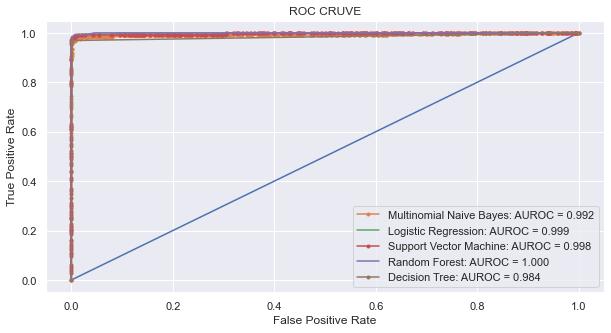

In [99]:
plt.figure(figsize=(10,5))
plt.plot([0,1])

plt.plot(nb_fpr,nb_tpr, marker='.', label= 'Multinomial Naive Bayes: AUROC = %0.3f' %nb_auc)
plt.plot(lr_fpr,lr_tpr, linestyle= '-', label= 'Logistic Regression: AUROC = %0.3f' %lr_auc)
plt.plot(svm_fpr,svm_tpr, marker='.', label= 'Support Vector Machine: AUROC = %0.3f' %svm_auc)
plt.plot(rf_fpr,rf_tpr, linestyle= '-', label= 'Random Forest: AUROC = %0.3f' %rf_auc)
plt.plot(dt_fpr,dt_tpr, marker='.', label= 'Decision Tree: AUROC = %0.3f' %dt_auc)


plt.title('ROC CRUVE')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()
plt.show()

## Comparing Evaluation Performance Curve

## Plotting Accuray score

In [132]:
import matplotlib
plt.style.available
matplotlib.style.use('seaborn-pastel')
df_evaluation=pd.read_csv('Evaluation.csv',encoding='latin-1')
x= df_evaluation['Classifiers']
y= df_evaluation[' Accuracy Score']


<BarContainer object of 5 artists>

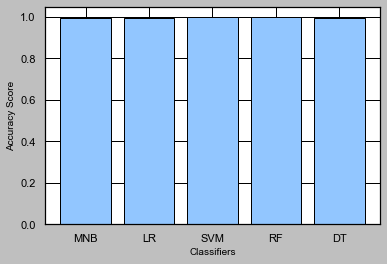

In [133]:
plt.xlabel('Classifiers', fontsize= 10, color="black")
plt.ylabel('Accuracy Score', fontsize= 10,color="black")
plt.bar(x,y)

## Plotting Precision score

In [134]:
matplotlib.style.use('seaborn-pastel')
df_evaluation=pd.read_csv('Evaluation.csv',encoding='latin-1')
x= df_evaluation['Classifiers']
y= df_evaluation['Precision Score']

<BarContainer object of 5 artists>

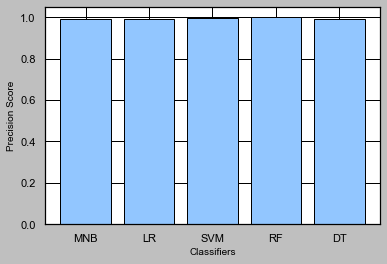

In [135]:
plt.xlabel('Classifiers', fontsize= 10, color="black")
plt.ylabel('Precision Score', fontsize= 10,color="black")
plt.bar(x,y)

## Plotting Recall score

In [136]:
matplotlib.style.use('seaborn-pastel')
df_evaluation=pd.read_csv('Evaluation.csv',encoding='latin-1')
x= df_evaluation['Classifiers']
y= df_evaluation['Recall Score']

<BarContainer object of 5 artists>

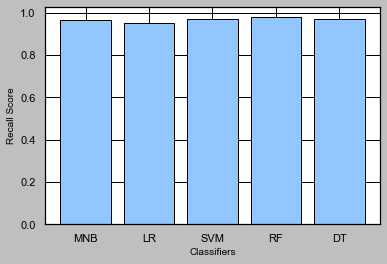

In [137]:
plt.xlabel('Classifiers', fontsize= 10, color="black")
plt.ylabel('Recall Score', fontsize= 10,color="black")
plt.bar(x,y)

## Plotting F1 score

In [138]:
matplotlib.style.use('seaborn-pastel')
df_evaluation=pd.read_csv('Evaluation.csv',encoding='latin-1')
x= df_evaluation['Classifiers']
y= df_evaluation['F1 Score']


<BarContainer object of 5 artists>

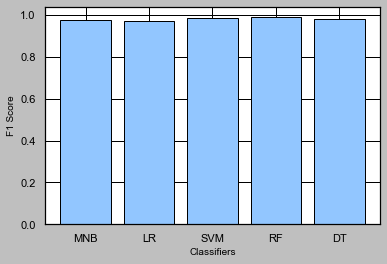

In [139]:
plt.xlabel('Classifiers', fontsize= 10, color="black")
plt.ylabel('F1 Score', fontsize= 10,color="black")
plt.bar(x,y)